In [13]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [14]:
house = pd.read_csv("house train.csv")
house.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


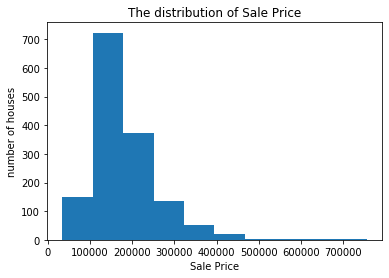

In [15]:
plt.hist(house.SalePrice)
plt.title("The distribution of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("number of houses")
plt.show()

In [16]:
house.corr().tail(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
PoolArea,0.057044,0.008283,0.206167,0.077672,0.065166,-0.001985,0.004950,0.005829,0.011723,0.140491,...,0.073378,0.060762,0.054203,-0.007992,0.051307,1.000000,0.029669,-0.033737,-0.059689,0.092404
MiscVal,-0.006242,-0.007683,0.003368,0.038068,-0.031406,0.068777,-0.034383,-0.010286,-0.029815,0.003571,...,-0.009551,-0.018584,0.018361,0.000354,0.031946,0.029669,1.000000,-0.006495,0.004906,-0.021190
MoSold,0.021172,-0.013585,0.011200,0.001205,0.070815,-0.003511,0.012398,0.021490,-0.005965,-0.015727,...,0.021011,0.071255,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,0.046432
YrSold,0.000712,-0.021407,0.007450,-0.014261,-0.027347,0.043950,-0.013618,0.035743,-0.008201,0.014359,...,0.022270,-0.057619,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.028923
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000


In [17]:
house["OverallQual"].isnull().values.any()

False

In [18]:
house["YearBuilt"].isnull().values.any()

False

In [30]:
# Y is the target variable
Y = house['SalePrice']
# X is the feature set which includes
# is_male and is_smoker variables
X = house[['OverallQual','YearBuilt','YrSold']]

In [31]:
import statsmodels.api as sm

# We need to add constant manually 
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     837.2
Date:                Tue, 07 Jul 2020   Prob (F-statistic):          2.69e-316
Time:                        00:52:06   Log-Likelihood:                -17812.
No. Observations:                1460   AIC:                         3.563e+04
Df Residuals:                    1456   BIC:                         3.565e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.853e+05   1.91e+06      0.149      0.881   -3.46e+06    4.03e+06
OverallQual  4.199e+04   1112.390     37.749      0.000    3.98e+04    4.42e+04
YearBuilt     274.6511     50.922      5.394      0.000     174.762     374.540
YrSold       -449.2121    949.988     -0.473      0.636   -2312.703    1414.279
==============================================================================
Omnibus:                      650.000   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7046.764
Skew:                           1.780   Prob(JB):                         0.00
Kurtosis:                      13.157   Cond. No.                     4.26e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
X = house[['OverallQual','YearBuilt']]

In [37]:
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     1256.
Date:                Tue, 07 Jul 2020   Prob (F-statistic):          7.52e-318
Time:                        00:55:42   Log-Likelihood:                -17812.
No. Observations:                1460   AIC:                         3.563e+04
Df Residuals:                    1457   BIC:                         3.565e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.166e+05   9.66e+04     -6.380      0.000   -8.06e+05   -4.27e+05
OverallQual    4.2e+04   1111.777     37.781      0.000    3.98e+04    4.42e+04
YearBuilt     274.5914     50.908      5.394      0.000     174.730     374.453
==============================================================================
Omnibus:                      649.933   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7045.246
Skew:                           1.780   Prob(JB):                         0.00
Kurtosis:                      13.156   Cond. No.                     1.51e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# We have built a regression model where the target variable is SalePrice. 
# And we used "OverallQual","YearBuilt","YrSold" as explanatory variables. and we estimated a model using OLS.
# The first two features are statistically significant. But since p-value of YrSold is near to 1, it is
# statistically insignificant. when we exclude the YrSold feature "OverallQual","YearBuilt" features stay 
# statistically significant. These features have more prominent effect on the house prices. These results sound reasonable.